# __Zomato Data Analysis using Python__

The main objective is to analyze Zomato’s restaurant dataset using Python to uncover customer preferences and restaurant trends for informed decision-making in the food industry.

## Importing important Python libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [3]:
z_data = pd.read_csv("Zomato-data-.csv")

In [5]:
print(z_data.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


## Data Cleaning

__Renaming the Columns__

In [12]:
column_names = [
    "Name", "Online Order", "Table Booked", "Ratings", "Votes", "Approx. Cost (for 2)", "Type"
]

z_data.columns = column_names

print(z_data.head())

                    Name Online Order Table Booked Ratings  Votes  \
0                  Jalsa          Yes          Yes   4.1/5    775   
1         Spice Elephant          Yes           No   4.1/5    787   
2        San Churro Cafe          Yes           No   3.8/5    918   
3  Addhuri Udupi Bhojana           No           No   3.7/5     88   
4          Grand Village           No           No   3.8/5    166   

   Approx. Cost (for 2)    Type  
0                   800  Buffet  
1                   800  Buffet  
2                   800  Buffet  
3                   300  Buffet  
4                   600  Buffet  


__Converting Ratings column into a float__

In [14]:
def handle_Rate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

z_data['Ratings'] = z_data['Ratings'].apply(handle_Rate)

print(z_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  148 non-null    object 
 1   Online Order          148 non-null    object 
 2   Table Booked          148 non-null    object 
 3   Ratings               148 non-null    float64
 4   Votes                 148 non-null    int64  
 5   Approx. Cost (for 2)  148 non-null    int64  
 6   Type                  148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB
None


## Data Analysis

__Exploring Restaurant Types__

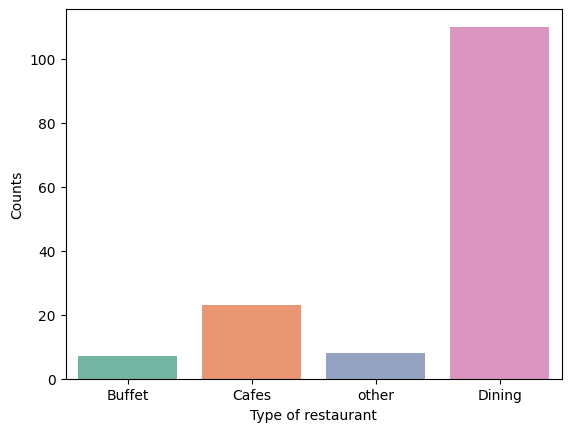


 Conclusion: The majority of the restaurants fall into the dining category.


In [30]:
sns.countplot(data=z_data, x='Type', hue='Type', palette='Set2', legend=False)
plt.xlabel("Type of restaurant")
plt.ylabel("Counts")
plt.show()

print(f"\n \033[1mConclusion\033[0m: The majority of the restaurants fall into the dining category.")

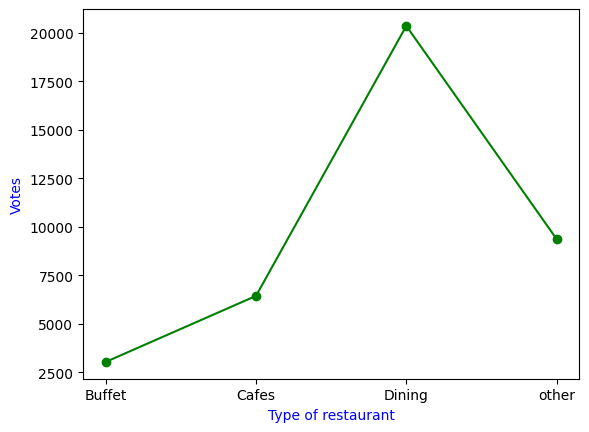


 Conclusion: Dining restaurants are preferred by a larger number of individuals.


In [31]:
grouped_data = z_data.groupby('Type')['Votes'].sum()
result = pd.DataFrame({'Votes': grouped_data})

plt.plot(result, c='green', marker='o')
plt.xlabel('Type of restaurant', c='blue')
plt.ylabel('Votes', c='blue')
plt.show()

print(f"\n \033[1mConclusion\033[0m: Dining restaurants are preferred by a larger number of individuals.")

__Identify the Most Voted Restaurant__

In [23]:
max_votes = z_data['Votes'].max()
restaurant_with_max_votes = z_data.loc[z_data['Votes'] == max_votes, 'Name']

print('Restaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: Name, dtype: object


__Online Order Availability__

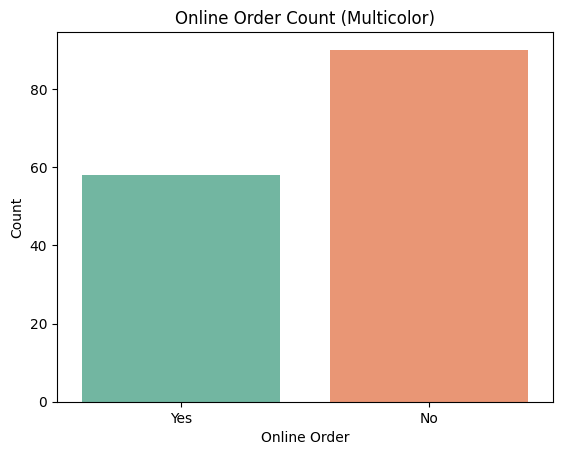


 Conclusion: This suggests that a majority of the restaurants do not accept online orders.


In [32]:
sns.countplot(data=z_data, x='Online Order', hue='Online Order', palette='Set2', legend=False)
plt.xlabel("Online Order")
plt.ylabel("Count")
plt.title("Online Order Count (Multicolor)")
plt.show()

print(f"\n \033[1mConclusion\033[0m: This suggests that a majority of the restaurants do not accept online orders.")

__Analyze Ratings__

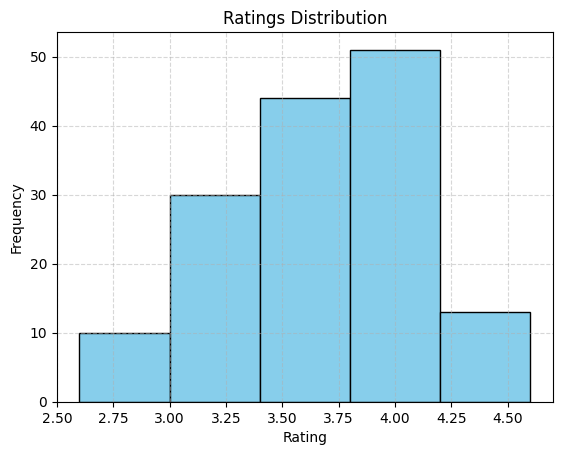


 Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.


In [33]:
plt.hist(z_data['Ratings'].dropna(), bins=5, color='skyblue', edgecolor='black')
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

print(f"\n \033[1mConclusion\033[0m: The majority of restaurants received ratings ranging from 3.5 to 4.")

__Approximate Cost for Couples__

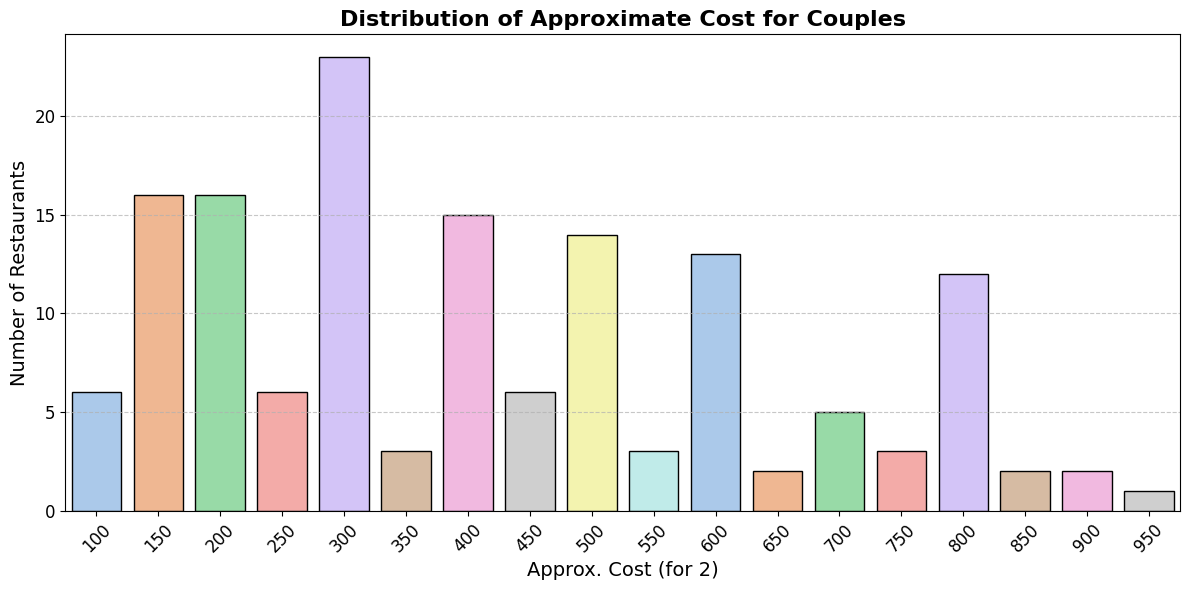


 Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.


In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x=couple_data, hue=couple_data, palette='pastel', edgecolor='black', legend=False)

plt.xlabel("Approx. Cost (for 2)", fontsize=14)
plt.ylabel("Number of Restaurants", fontsize=14)
plt.title("Distribution of Approximate Cost for Couples", fontsize=16, weight='bold')

plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

print(f"\n \033[1mConclusion\033[0m: The majority of couples prefer restaurants with an approximate cost of 300 rupees.")

__Ratings Comparison - Online vs Offline Orders__

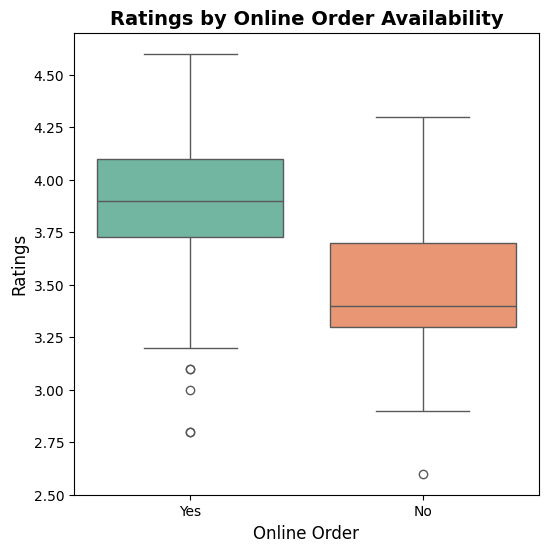


 Conclusion: Offline orders received lower ratings in comparison to online orders which obtained excellent ratings.


In [38]:
plt.figure(figsize=(6,6))
sns.boxplot(x='Online Order', y='Ratings', data=z_data, hue='Online Order', palette='Set2', legend=False)

plt.title('Ratings by Online Order Availability', fontsize=14, weight='bold')
plt.xlabel('Online Order', fontsize=12)
plt.ylabel('Ratings', fontsize=12)
plt.show()

print(f"\n \033[1mConclusion\033[0m: Offline orders received lower ratings in comparison to online orders which obtained excellent ratings.")

__Order Mode Preferences by Restaurant Type__

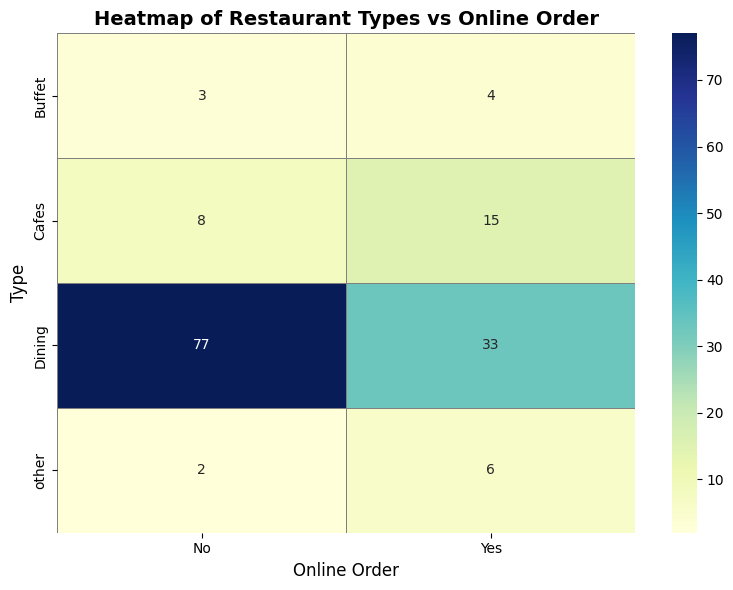


 Conclusion: Dining restaurants primarily accept offline orders whereas cafes primarily receive online orders.
 This suggests that clients prefer to place orders in person at restaurants but prefer online ordering at cafes.


In [41]:
pivot_table = z_data.pivot_table(index='Type', columns='Online Order', aggfunc='size', fill_value=0)

plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d', linewidths=0.5, linecolor='gray')

plt.title('Heatmap of Restaurant Types vs Online Order', fontsize=14, weight='bold')
plt.xlabel('Online Order', fontsize=12)
plt.ylabel('Type', fontsize=12)
plt.tight_layout()
plt.show()

print(f"\n \033[1mConclusion\033[0m: Dining restaurants primarily accept offline orders whereas cafes primarily receive online orders.\n This suggests that clients prefer to place orders in person at restaurants but prefer online ordering at cafes.")